<a href="https://colab.research.google.com/github/Shimolika024/Disaster_Impact_Prediction/blob/main/EM_DAT_final_cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('public_emdat_project.csv', encoding= 'ISO-8859-1')
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",01-03-2006,25-09-2023
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",08-03-2006,25-09-2023
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",08-03-2006,25-09-2023
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,27-10-2004,25-09-2023
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",03-02-2005,25-09-2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     15784 non-null  object 
 1   Historic                                   15784 non-null  object 
 2   Classification Key                         15784 non-null  object 
 3   Disaster Group                             15784 non-null  object 
 4   Disaster Subgroup                          15784 non-null  object 
 5   Disaster Type                              15784 non-null  object 
 6   Disaster Subtype                           15784 non-null  object 
 7   External IDs                               2405 non-null   object 
 8   Event Name                                 4955 non-null   object 
 9   ISO                                        15784 non-null  object 
 10  Country               

In [ ]:
#converting date-time
df['Entry Date'] = pd.to_datetime(df['Entry Date'], errors='coerce')
df['Last Update'] = pd.to_datetime(df['Last Update'], errors='coerce')

In [ ]:
#handling missing info
df.fillna(0, inplace=True)

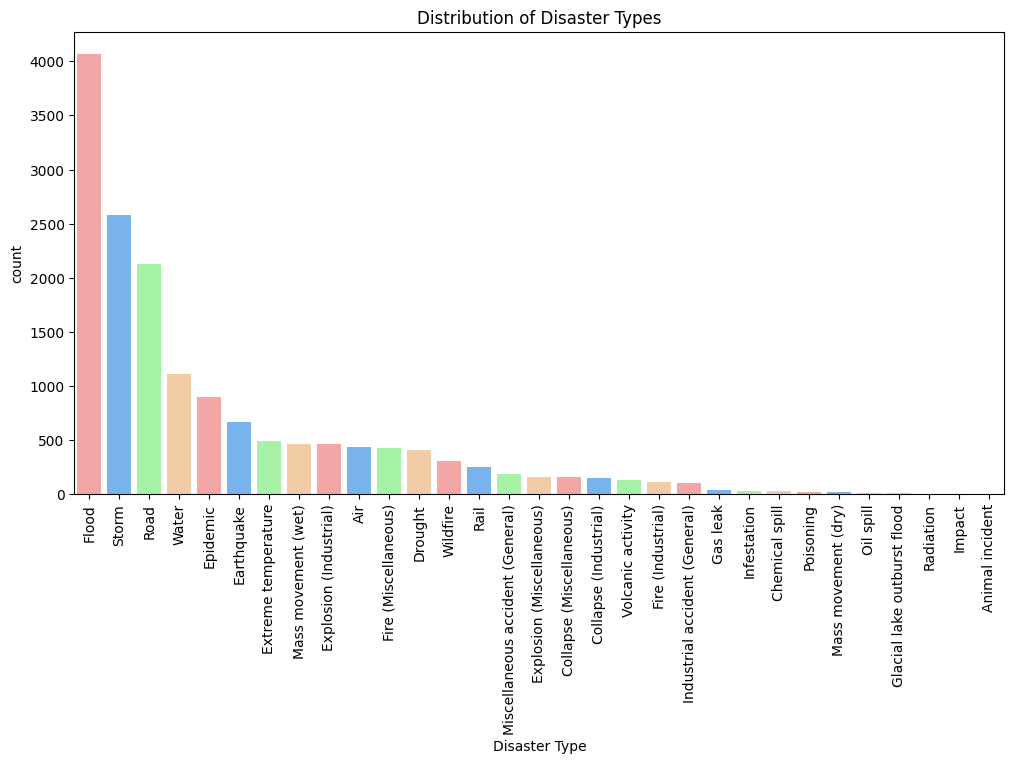

In [ ]:
# Distribution of disaster types
plt.figure(figsize=(12, 6))
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.countplot(data=df, x='Disaster Type', order=df['Disaster Type'].value_counts().index, palette=custom_colors)
plt.xticks(rotation=90)
plt.title('Distribution of Disaster Types')
plt.show()


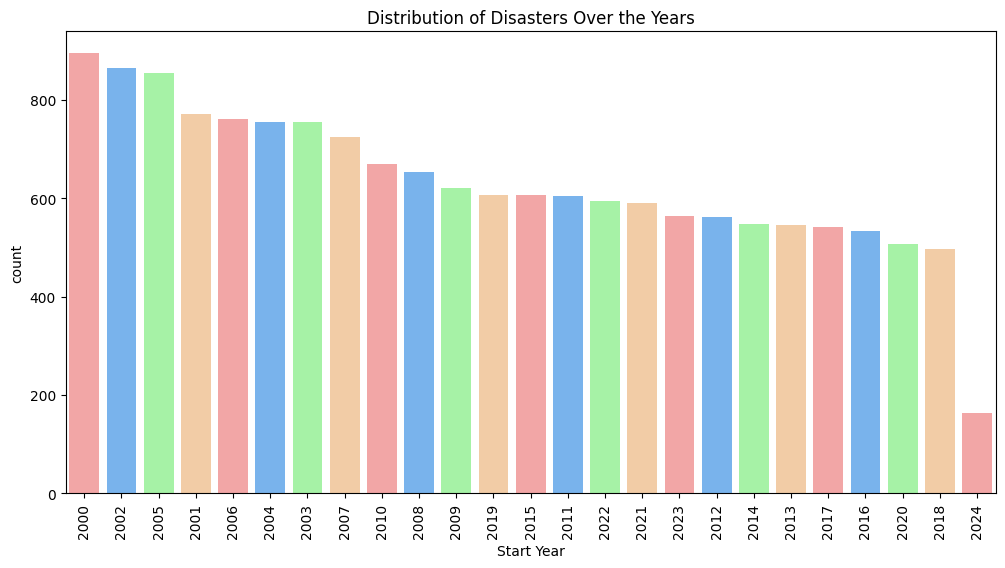

In [ ]:
# Distribution of disasters over the years
plt.figure(figsize=(12, 6))
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.countplot(data=df, x='Start Year', order=df['Start Year'].value_counts().index, palette=custom_colors)
plt.xticks(rotation=90)
plt.title('Distribution of Disasters Over the Years')
plt.show()

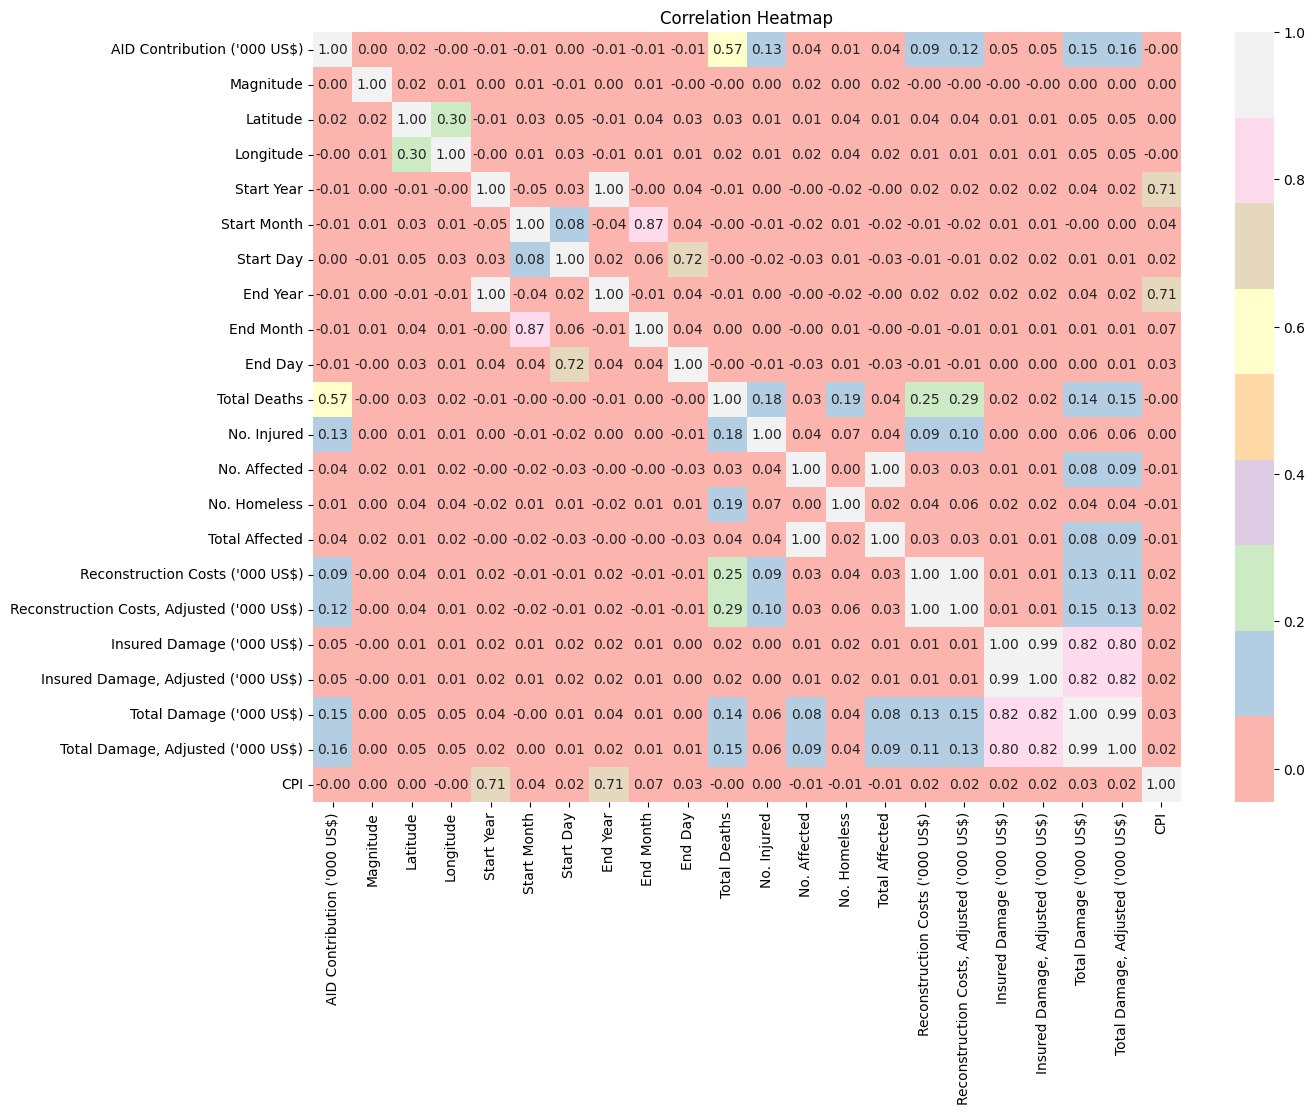

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Pastel1', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

In [ ]:
# Extract unique years and sort them
x = np.sort(df['Start Year'].unique())

# Get the count of occurrences of each year
y = df['Start Year'].value_counts().sort_index()

# Print the sorted unique years and their counts
print("Unique years:", x)
print("Year counts:", y)

Unique years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Year counts: Start Year
2000    894
2001    771
2002    865
2003    754
2004    755
2005    854
2006    760
2007    724
2008    654
2009    620
2010    670
2011    604
2012    561
2013    545
2014    548
2015    606
2016    534
2017    542
2018    497
2019    607
2020    507
2021    591
2022    595
2023    563
2024    163
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# x is a 1D array, needs to be reshaped to a 2D array
x = x.reshape(-1, 1)  # Reshape x to a 2D array for LinearRegression
lin_reg.fit(x, y) # Fit the model using the fit method

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
# x is a 1D array, needs to be reshaped to a 2D array
x_poly = poly_reg.fit_transform(x.reshape(-1, 1)) #Reshape x to a 2D array
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

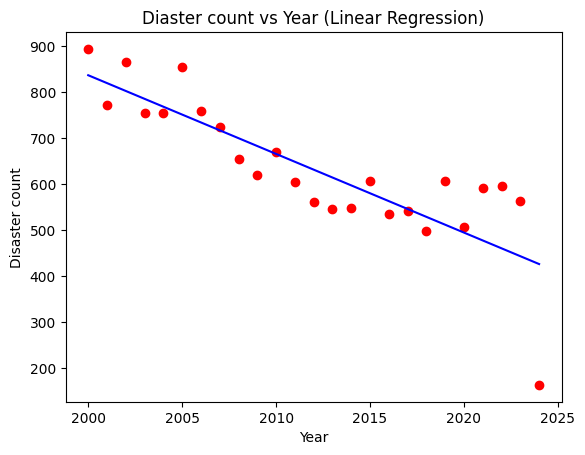

In [ ]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x.reshape(-1, 1)), color = 'blue') # Reshape x to a 2D array before passing it to predict()
plt.title('Diaster count vs Year (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Disaster count')
plt.show()

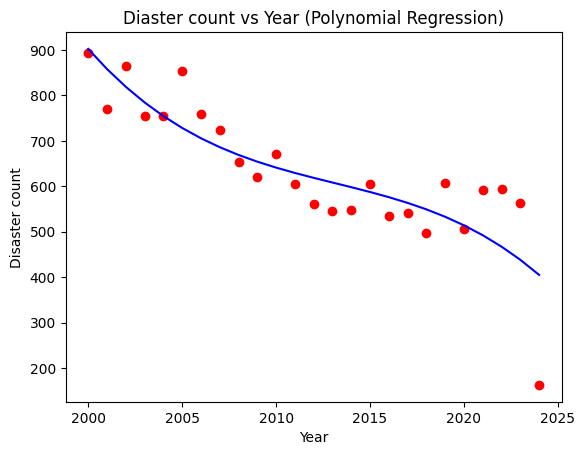

In [ ]:
plt.scatter(x, y, color = 'red')
#Reshape x before passing it to fit_transform()
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x.reshape(-1, 1))), color = 'blue')
plt.title('Diaster count vs Year (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Disaster count')
plt.show()

In [ ]:
#using LINEAR REGRESSION
lin_reg.predict([[2030]]) #predict disaster count for 2030 (any future year)

array([323.24153846])

In [ ]:
#using POLYNOMIAL REGRESSION
lin_reg_2.predict(poly_reg.fit_transform([[2030]])) #predict disaster count for 2030 (any future year)

array([92.78374112])

Mean Squared Error: 4646.60
R^2 Score: 0.72


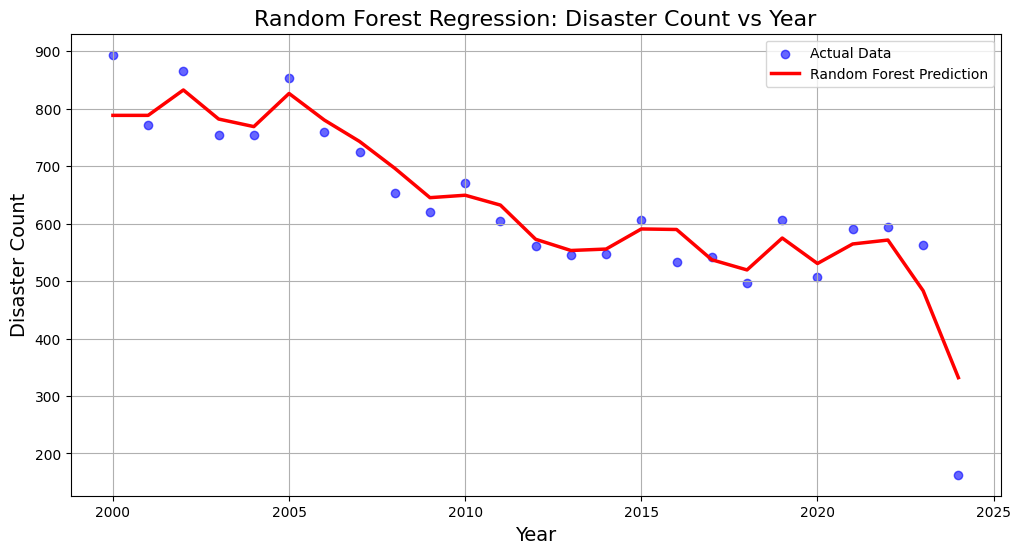

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Ensure relevant columns are present
if 'Start Year' not in df.columns or 'Disaster Type' not in df.columns:
    raise ValueError("Dataset must contain 'Start Year' and 'Disaster Type' columns.")

# Aggregate disaster counts by year
disaster_counts = df.groupby('Start Year').size().reset_index(name='Disaster Count')

# Prepare features (X) and target (y)
X = disaster_counts[['Start Year']]
y = disaster_counts['Disaster Count']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Predict across all years for smoother plotting
years = np.arange(X['Start Year'].min(), X['Start Year'].max() + 1).reshape(-1, 1)
predicted_counts = rf_regressor.predict(years)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(years, predicted_counts, color='red', linewidth=2.5, label='Random Forest Prediction')
plt.title('Random Forest Regression: Disaster Count vs Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Disaster Count', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


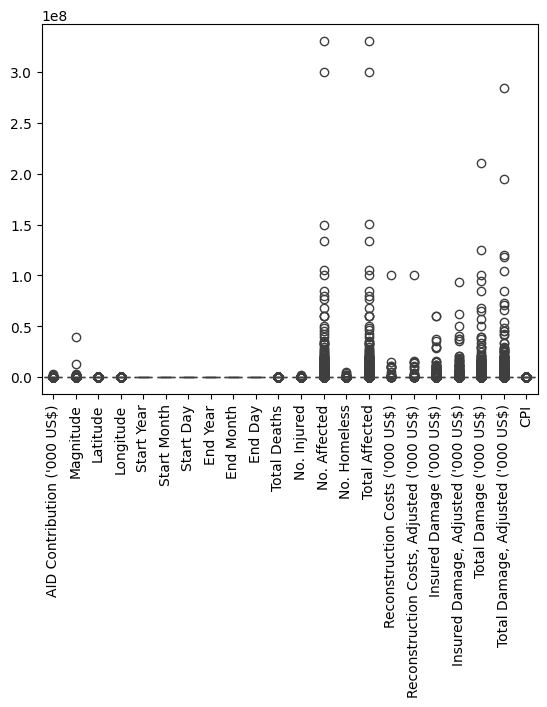

In [ ]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
z = df['Disaster Group'].value_counts()
print(z)

Disaster Group
Natural          10045
Technological     5739
Name: count, dtype: int64


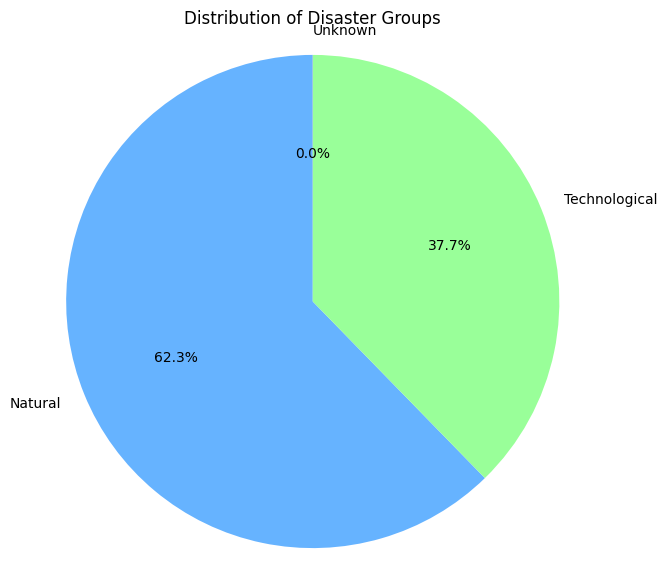

In [ ]:
# Data for the pie chart
labels = ['Natural', 'Technological', 'Unknown']  #'0'='Unknown'
sizes = [8695, 5261, 1]  # Values corresponding to the Disaster Group counts
colors = ['#66b3ff', '#99ff99', '#ff9999']

plt.figure(figsize=(7, 7))  # Optional: Set the figure size
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') ## Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Disaster Groups')
plt.show()

In [ ]:
m = df['Disaster Subgroup'].value_counts()
print(m)

Disaster Subgroup
Hydrological              4531
Transport                 3912
Meteorological            3067
Biological                 924
Miscellaneous accident     924
Industrial accident        903
Geophysical                804
Climatological             718
Extra-terrestrial            1
Name: count, dtype: int64


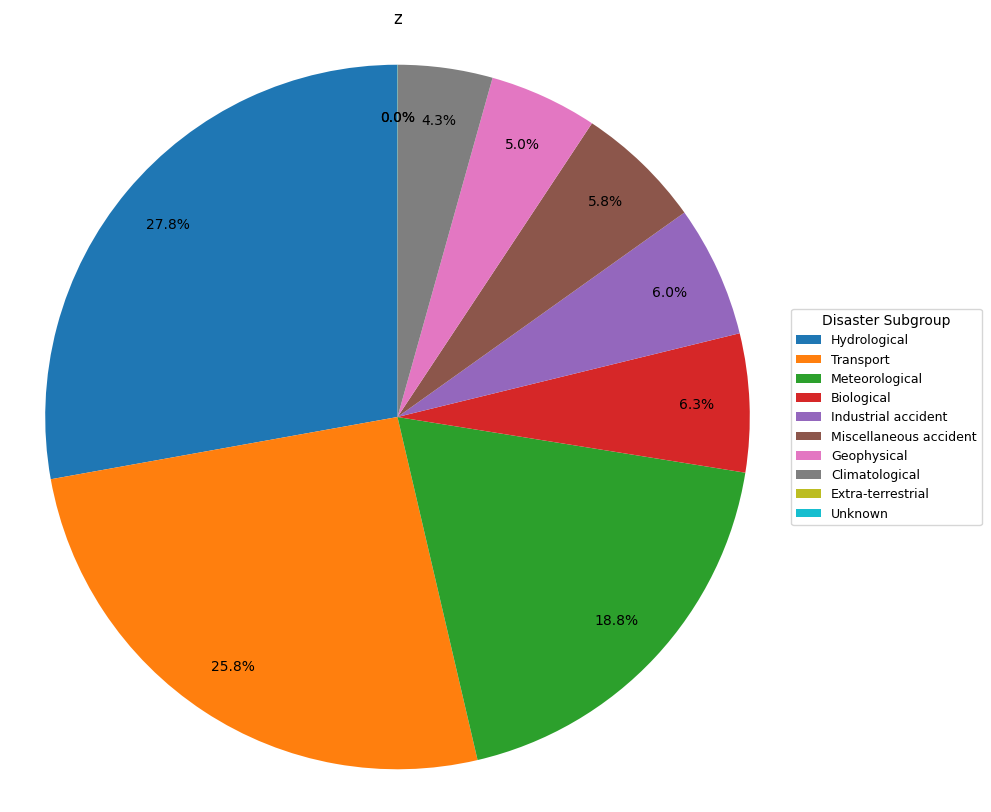

In [ ]:
# Data for the pie chart (Disaster Subgroup counts)
subgroup_labels = [
    'Hydrological', 'Transport', 'Meteorological', 'Biological', 'Industrial accident',
    'Miscellaneous accident', 'Geophysical', 'Climatological', 'Extra-terrestrial', 'Unknown']
subgroup_counts = [3884, 3604, 2627, 886, 842, 815, 692, 605, 1, 1]

# pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(subgroup_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.axis('equal')
plt.legend(wedges, subgroup_labels, title="Disaster Subgroup", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9) #legend
plt.title('z')
plt.show()

In [ ]:
print(df['Region'].value_counts())

Region
Asia        6383
Africa      4068
Americas    3102
Europe      1826
Oceania      405
Name: count, dtype: int64


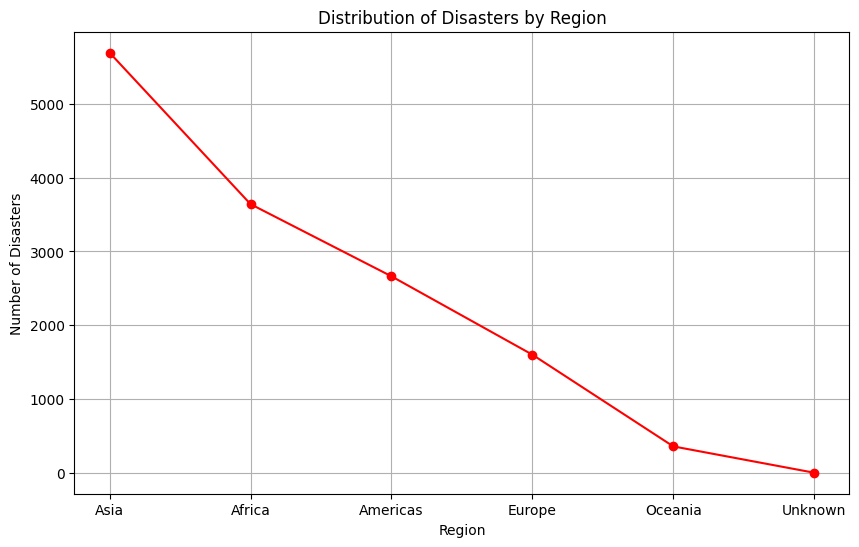

In [ ]:
# Data for the line plot (Region counts)
regions = ['Asia', 'Africa', 'Americas', 'Europe', 'Oceania', 'Unknown']  # Replaced '0' with 'Unknown'
counts = [5693, 3641, 2663, 1601, 358, 1]

# line plot
plt.figure(figsize=(10, 6))
plt.plot(regions, counts, marker='o', linestyle='-', color='r')
plt.title('Distribution of Disasters by Region')
plt.xlabel('Region')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.show()

In [ ]:
Casualties = df.groupby('Start Year')[['No. Homeless', 'No. Injured', 'Total Deaths']].sum()
Casualties

,No. Homeless,No. Injured,Total Deaths
Start Year,,,
2000,1769895.0,31236.0,28047.0
2001,3134401.0,288401.0,48008.0
2002,382630.0,61377.0,34393.0
2003,2913170.0,214644.0,124308.0
2004,2654433.0,1896449.0,255045.0
2005,6338692.0,172386.0,105108.0
2006,6271873.0,175061.0,39758.0
2007,1170953.0,78571.0,30057.0
2008,3252031.0,400913.0,248936.0


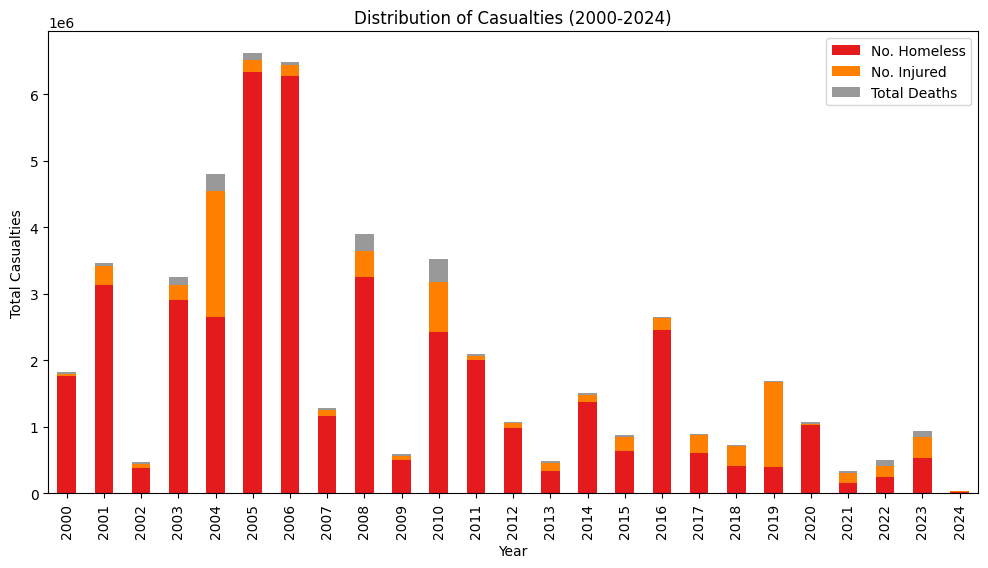

In [ ]:
Casualties.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set1')
plt.title('Distribution of Casualties (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.show()

# classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# **Change 1: Create a new column 'DisasterOccurred' based on a relevant condition**
# **For example, assume 'Total Deaths' > 0 indicates a significant disaster**
df['DisasterOccurred'] = (df['Total Deaths'] > 0).astype(int) # Changed 'data' to 'df'
#This line creates a new column 'DisasterOccurred' in the DataFrame 'df'. It checks if the value in the 'Total Deaths' column is greater than 0 for each row. If it is, it assigns 1 to the 'DisasterOccurred' column for that row, indicating a significant disaster. Otherwise, it assigns 0. The .astype(int) part converts the resulting boolean values (True/False) to integers (1/0).

# Select relevant features for prediction, here we use 'Start Year' as the primary feature
data_model = df[['Start Year', 'DisasterOccurred']] # Changed 'data' to 'df'

# Step 2: Split the data into training and testing sets
X = data_model[['Start Year']]  # Features
y = data_model['DisasterOccurred']  # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

# Step 6: Predicting for a specific year (example)

year_to_predict = 2099  # Replace with the desired year

year_prediction = log_reg.predict([[year_to_predict]])
print(f"Prediction for year {year_to_predict}: {'Disaster will happen' if year_prediction[0] == 1 else 'No disaster'}")

Accuracy: 0.8038429054054054
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       929
           1       0.80      1.00      0.89      3807

    accuracy                           0.80      4736
   macro avg       0.40      0.50      0.45      4736
weighted avg       0.65      0.80      0.72      4736

Prediction for year 2099: Disaster will happen


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score

data_path = 'public_emdat_project.csv'
df = pd.read_csv(data_path, encoding='latin-1')

In [ ]:
try:

    # Group rare disaster types
    disaster_counts = df['Disaster Type'].value_counts()
    rare_disasters = disaster_counts[disaster_counts < 10].index
    df['Disaster Type'] = df['Disaster Type'].apply(
        lambda x: 'Other' if x in rare_disasters else x
    )

    # Continue with existing code
    print("Dataset Overview:")
    print(df.head())
    print("\nDataset Information:")
    print(df.info())

    target = 'Disaster Type'
    X = df.drop(columns=[target])
    y = df[target]

    label_encoders = {}
    categorical_columns = X.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        try:
            le = LabelEncoder()
            X[column] = le.fit_transform(X[column].astype(str))
            label_encoders[column] = le
        except Exception as e:
            print(f"Error encoding column {column}:", str(e))

    numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
    X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())
    X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])

    scaler = StandardScaler()
    X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("\nModel Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

except Exception as e:
    print("An error occurred during the classification process:", str(e))
    print("Please check your data and column names.")

Dataset Overview:
          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
2  1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
3  2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
4  2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

  Disaster Type Disaster Subtype External IDs Event Name  ISO  ...  \
0       Drought          Drought          NaN        NaN  DJI  ...   
1       Drought          Drought          NaN        NaN  SDN  ...   
2       Drought          Drought          NaN        NaN  SOM  ...   
3          Road             Road          NaN        NaN  AGO  ...   
4         Flood   Riverine flood          NaN        NaN  AGO  ...   

  Reconstruction Costs ('000 US$) Reconstruction Costs, Adjusted ('000 US$

In [ ]:
df_cleaned = df[['Latitude', 'Longitude', 'Total Deaths']].dropna().copy()
df_cleaned['Total Deaths'] = pd.to_numeric(df_cleaned['Total Deaths'], errors='coerce')

# Convert target variable into categorical classes
df_cleaned['Total Deaths'] = pd.qcut(df_cleaned['Total Deaths'], q=3, labels=[0, 1, 2])

# Features and target
X = df_cleaned[['Latitude', 'Longitude']]
y = df_cleaned['Total Deaths']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(n_estimators=100)
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "R2 Score": r2}
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.46      0.38        84
           1       0.28      0.13      0.18        89
           2       0.38      0.42      0.40        98

    accuracy                           0.34       271
   macro avg       0.33      0.34      0.32       271
weighted avg       0.33      0.34      0.32       271


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.49      0.44        84
           1       0.43      0.40      0.42        89
           2       0.47      0.40      0.43        98

    accuracy                           0.43       271
   macro avg       0.43      0.43      0.43       271
weighted avg       0.43      0.43      0.43       271


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.40      0.38        84
      

                        Accuracy  R2 Score
XGBoost                 0.457565 -0.654928
Gradient Boosting       0.446494 -0.671477
Decision Tree           0.428044 -0.748707
K-Nearest Neighbors     0.413284 -0.721125
Random Forest           0.409594 -0.892135
Naive Bayes             0.409594 -0.974881
Support Vector Machine  0.372694 -0.980397
Logistic Regression     0.339483 -1.162439


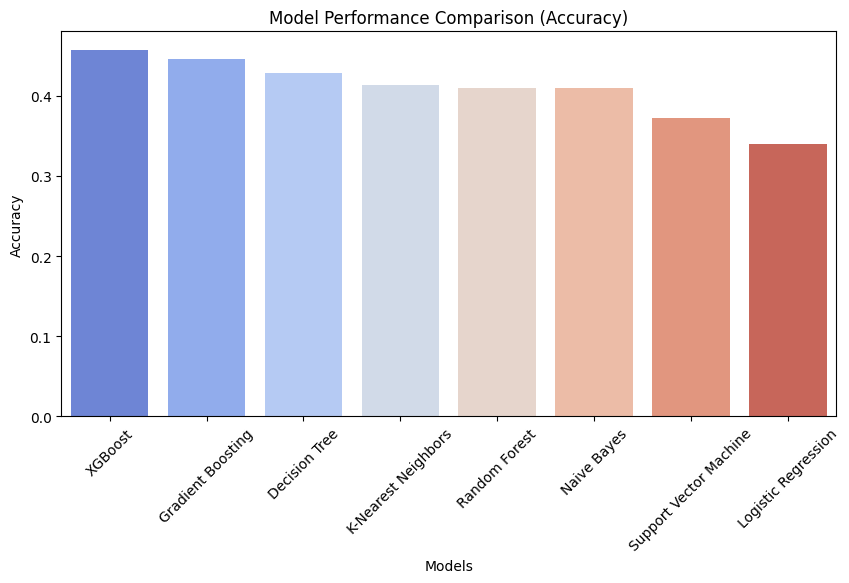

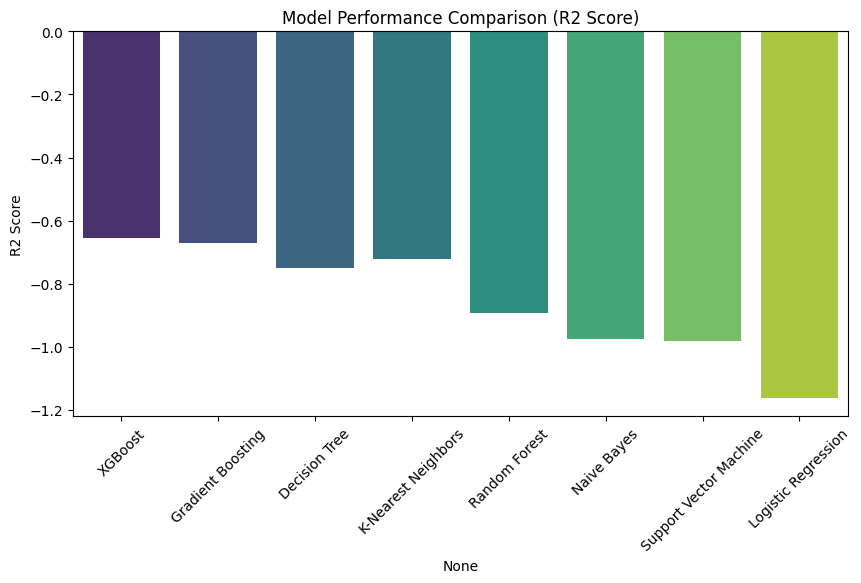

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)
print(results_df)

# Plot Accuracy results
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

# Plot R2 Score results
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['R2 Score'], palette='viridis')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()


# Clustering

Cluster Centroids:
             Magnitude  Total Deaths  No. Injured   No. Affected   Latitude  \
Cluster                                                                       
0         27176.342710   1168.401869  4107.406542  683267.925234  33.238970   
1         12140.198790    628.943548  1759.564516  395326.330645   0.627930   
2        152117.320103   2392.432990  3701.154639  339119.948454   3.014021   

          Longitude  
Cluster              
0         75.468897  
1        102.134245  
2        -67.120021  
Clustered data saved to kmeans_clustered_data_k3.csv


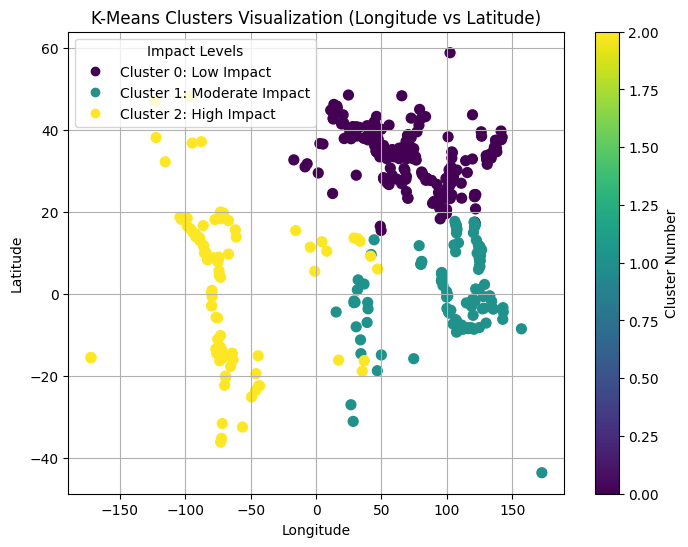


Cluster 0 (Low Impact):
           Magnitude  Total Deaths    No. Injured  No. Affected    Latitude  \
count     214.000000    214.000000     214.000000  2.140000e+02  214.000000   
mean    27176.342710   1168.401869    4107.406542  6.832679e+05   33.238970   
std     83833.463848   7392.129619   28644.730480  3.382667e+06    6.826046   
min         4.800000      1.000000       1.000000  1.000000e+02   15.540000   
25%         5.900000      3.000000      24.000000  3.632500e+03   28.053250   
50%         6.600000     13.000000      88.500000  2.235800e+04   33.863500   
75%      4802.500000     51.000000     505.750000  2.000000e+05   38.032000   
max    776608.030000  87476.000000  366596.000000  4.561000e+07   58.911000   

        Longitude  Cluster  
count  214.000000    214.0  
mean    75.468897      0.0  
std     36.068276      0.0  
min    -16.970000      0.0  
25%     48.846750      0.0  
50%     72.080000      0.0  
75%    102.940500      0.0  
max    142.373000      0.0  

C

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Select relevant features (including 'No. Injured')
relevant_features = ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'Latitude', 'Longitude']
clustering_data = df[relevant_features]

# Step 3: Handle missing values by dropping rows with NaNs
clustering_data = clustering_data.dropna()

# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Step 5: Apply K-Means++ with k=3 (based on Elbow Method)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 6: Analyze cluster centroids
cluster_centroids = clustering_data.groupby('Cluster').mean()
print("Cluster Centroids:")
print(cluster_centroids)

# Save clustered data to a CSV file
output_path = "kmeans_clustered_data_k3.csv"
clustering_data.to_csv(output_path, index=False)
print(f"Clustered data saved to {output_path}")

# Step 7: Visualize clusters on a scatter plot (Longitude vs Latitude) with labels
plt.figure(figsize=(8, 6))

# Define cluster labels based on analysis of centroids
cluster_labels = {
    0: "Low Impact",
    1: "Moderate Impact",
    2: "High Impact"
}

# Create scatter plot
scatter = plt.scatter(clustering_data['Longitude'], clustering_data['Latitude'],
                       c=clustering_data['Cluster'], cmap='viridis', s=50)

# Add a legend with custom labels for clusters
handles, _ = scatter.legend_elements()
legend_labels = [f"Cluster {i}: {cluster_labels[i]}" for i in range(optimal_clusters)]
plt.legend(handles, legend_labels, title="Impact Levels", loc="best")

# Add titles and labels
plt.title('K-Means Clusters Visualization (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()

# Step 8: Label and interpret clusters in the console output
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} ({cluster_labels[cluster]}):")
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    print(cluster_data.describe())


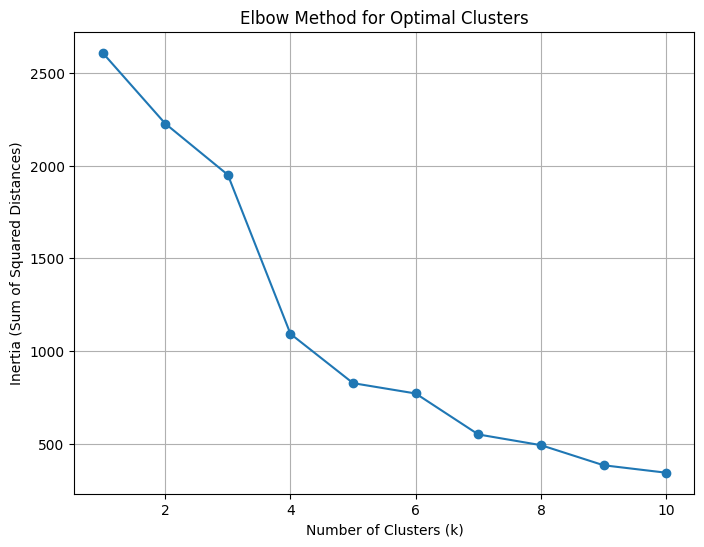

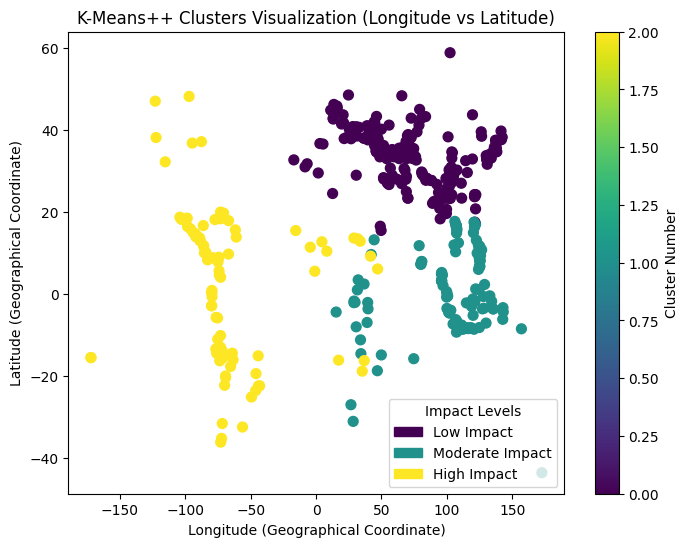

Clustered data saved to kmeans++_clustered_data.csv


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np  # Import numpy

# Step 1: Load the dataset
file_path = "public_emdat_project.csv"  # Replace with your file name
data = pd.read_csv(file_path, encoding='latin1')

# Step 2: Select relevant features (including 'No. Injured')
relevant_features = ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'Latitude', 'Longitude']
clustering_data = df[relevant_features]

# Step 3: Handle missing values by dropping rows with NaNs
clustering_data = clustering_data.dropna()

# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Step 5: Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Step 6: Visualize the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid()
plt.show()

# Step 7: Apply K-Means++ with the optimal number of clusters (e.g., 3)
optimal_clusters = 3  # Replace with your choice based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 8: Define custom labels for clusters
cluster_labels = {
    0: "Low Impact",
    1: "Moderate Impact",
    2: "High Impact"
}

# Step 9: Visualize the clusters using Longitude and Latitude
plt.figure(figsize=(8, 6))
scatter = plt.scatter(clustering_data['Longitude'], clustering_data['Latitude'],
                    c=clustering_data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means++ Clusters Visualization (Longitude vs Latitude)')
plt.xlabel('Longitude (Geographical Coordinate)')
plt.ylabel('Latitude (Geographical Coordinate)')
plt.colorbar(label='Cluster Number')

# Manually create legend handles and labels with correct colors
# Normalize cluster values to the range [0, 1] for the colormap
norm = plt.Normalize(0, optimal_clusters - 1)
legend_handles = [mpatches.Patch(color=plt.cm.viridis(norm(i)), label=cluster_labels[i]) for i in range(optimal_clusters)]

plt.legend(handles=legend_handles, title='Impact Levels')

plt.show()

# Step 10: Save the clustered data to a CSV file
output_path = "kmeans++_clustered_data.csv"
clustering_data.to_csv(output_path, index=False)
print(f"Clustered data saved to {output_path}")


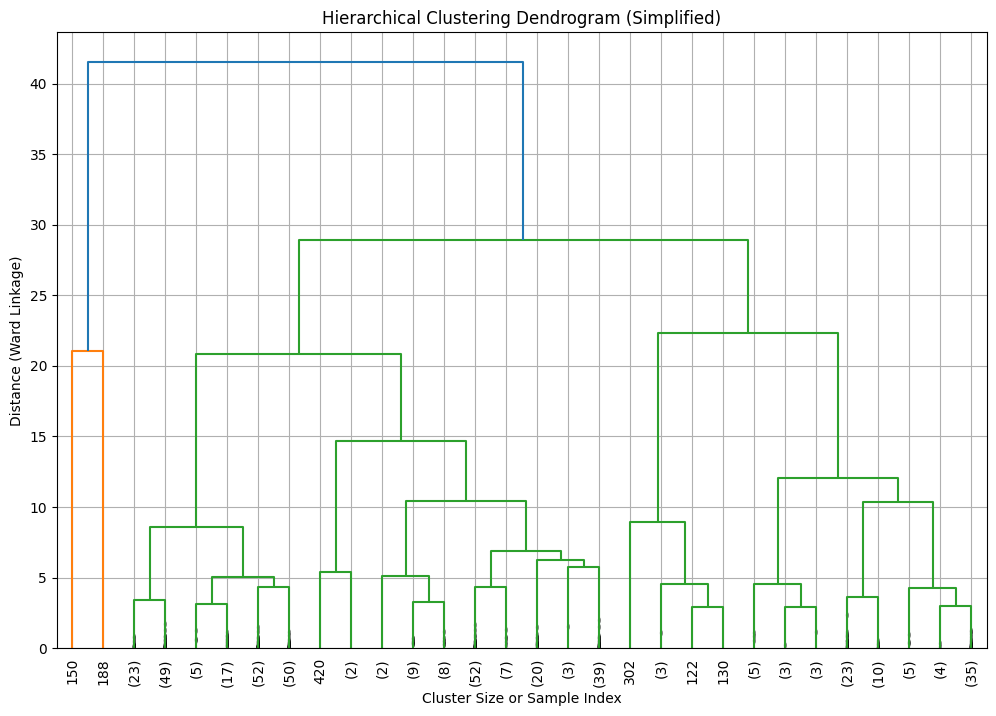

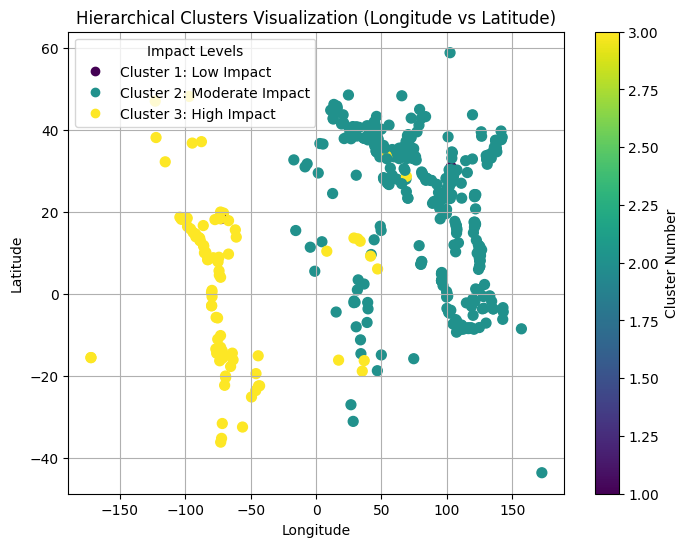

Clustered data saved to hierarchical_clustered_data.csv

Cluster 1 (Low Impact):
       Magnitude   Total Deaths  No. Injured  No. Affected   Latitude  \
count   2.000000       2.000000       2.0000  2.000000e+00   2.000000   
mean    7.450000  155023.000000  333298.0000  2.450500e+07  24.722500   
std     0.636396   95525.883498   47090.4832  2.984698e+07   8.880554   
min     7.000000   87476.000000  300000.0000  3.400000e+06  18.443000   
25%     7.225000  121249.500000  316649.0000  1.395250e+07  21.582750   
50%     7.450000  155023.000000  333298.0000  2.450500e+07  24.722500   
75%     7.675000  188796.500000  349947.0000  3.505750e+07  27.862250   
max     7.900000  222570.000000  366596.0000  4.561000e+07  31.002000   

        Longitude  Cluster  
count    2.000000      2.0  
mean    15.375500      1.0  
std    124.375133      0.0  
min    -72.571000      1.0  
25%    -28.597750      1.0  
50%     15.375500      1.0  
75%     59.348750      1.0  
max    103.322000      1.0  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "public_emdat_project.csv"  # Replace with your file name
data = pd.read_csv(file_path, encoding='latin1')

# Step 2: Select relevant features for clustering
relevant_features = ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'Latitude', 'Longitude']
clustering_data = df[relevant_features].dropna()

# Step 3: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Step 4: Perform Hierarchical Clustering using the 'ward' method
linked = linkage(normalized_data, method='ward')

# Step 5: Plot the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True
)
plt.title('Hierarchical Clustering Dendrogram (Simplified)')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance (Ward Linkage)')
plt.grid(True)
plt.show()

# Step 6: Assign clusters (e.g., 3 clusters based on dendrogram analysis)
num_clusters = 3
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')
clustering_data['Cluster'] = cluster_labels

# Step 7: Define custom labels for clusters (similar to K-Means)
cluster_descriptions = {
    1: "Low Impact",
    2: "Moderate Impact",
    3: "High Impact"
}

# Step 8: Visualize clusters on a scatter plot (Longitude vs Latitude) with labels
plt.figure(figsize=(8, 6))

# Create scatter plot
scatter = plt.scatter(
    clustering_data['Longitude'],
    clustering_data['Latitude'],
    c=clustering_data['Cluster'],
    cmap='viridis',
    s=50
)

# Add a legend with custom labels for clusters
handles, _ = scatter.legend_elements()
legend_labels = [f"Cluster {i}: {cluster_descriptions[i]}" for i in range(1, num_clusters + 1)]
plt.legend(handles, legend_labels, title="Impact Levels", loc="best")

# Add titles and labels
plt.title('Hierarchical Clusters Visualization (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()

# Step 9: Save clustered data to a CSV file (optional)
output_path = "hierarchical_clustered_data.csv"
clustering_data.to_csv(output_path, index=False)
print(f"Clustered data saved to {output_path}")

# Step 10: Label and interpret clusters in the console output (optional)
for cluster in range(1, num_clusters + 1):
    print(f"\nCluster {cluster} ({cluster_descriptions[cluster]}):")
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    print(cluster_data.describe())


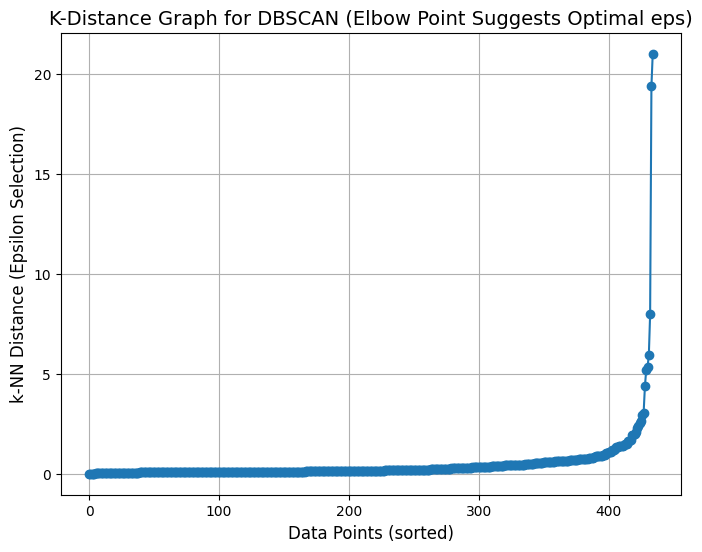

Clustered data saved to dbscan_clustered_data.csv


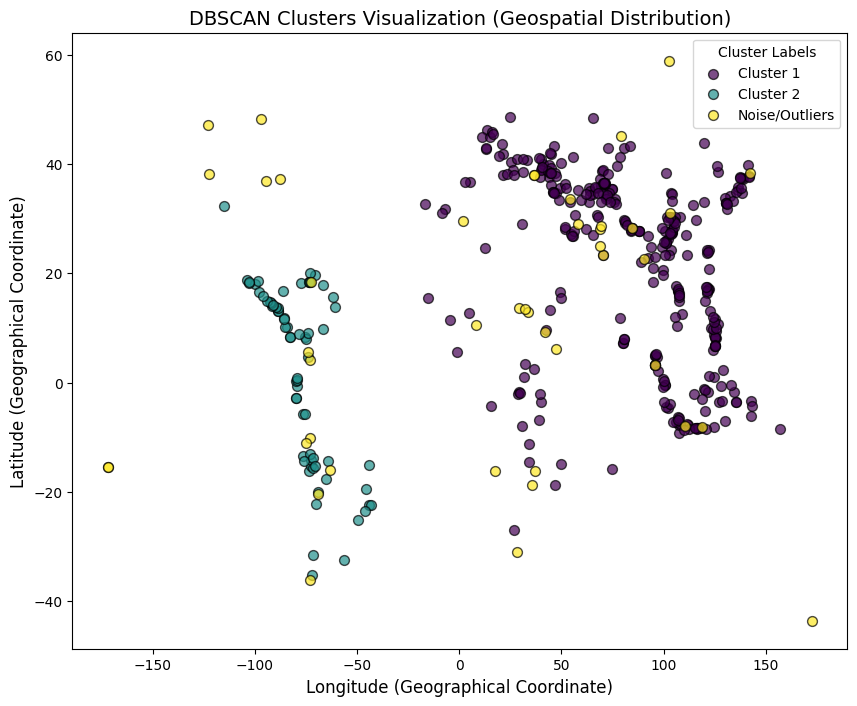

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Step 1: Load the dataset
file_path = "public_emdat_project.csv"  # Replace with your file name
data = pd.read_csv(file_path, encoding='latin1')

# Step 2: Select relevant features for clustering
relevant_features = ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'Latitude', 'Longitude']
clustering_data = df[relevant_features]

# Step 3: Handle missing values by dropping rows with NaNs
clustering_data = clustering_data.dropna()

# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Step 5: Determine optimal eps using k-distance plot
k = 5  # Recommended: min_samples = 2 * num_features
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(normalized_data)
distances, indices = neighbors.kneighbors(normalized_data)

# Sort distances and plot k-distance graph
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 6))
plt.plot(distances, marker='o')
plt.xlabel('Data Points (sorted)', fontsize=12)
plt.ylabel('k-NN Distance (Epsilon Selection)', fontsize=12)
plt.title('K-Distance Graph for DBSCAN (Elbow Point Suggests Optimal eps)', fontsize=14)
plt.grid()
plt.show()

# Step 6: Apply DBSCAN with fine-tuned parameters
optimal_eps = 0.8  # Replace with value observed from k-distance plot
min_samples = 10  # Adjust based on dataset characteristics
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
clustering_data['Cluster'] = dbscan.fit_predict(normalized_data)

# Define custom labels for clusters
cluster_labels = {
    -1: "Noise/Outliers",  # Label for noise points
    0: "Cluster 1",       # Label for cluster 1
    1: "Cluster 2",       # Label for cluster 2
    2: "Cluster 3"        # Label for cluster 3 (add as needed)
}

# Map cluster labels to their names in a new column (optional)
clustering_data['Cluster Name'] = clustering_data['Cluster'].map(cluster_labels)

# Save the clustered data to a CSV file
output_path = "dbscan_clustered_data.csv"
clustering_data.to_csv(output_path, index=False)
print(f"Clustered data saved to {output_path}")

# Step 7: Visualize the clusters using Longitude and Latitude
plt.figure(figsize=(10, 8))

# Plot clusters with consistent colormap and generate legend dynamically
unique_clusters = clustering_data['Cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_points = clustering_data[clustering_data['Cluster'] == cluster]
    label = cluster_labels.get(cluster, f"Cluster {cluster}")
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'],
                c=[color], label=label, s=50, alpha=0.7, edgecolors='k')

plt.title('DBSCAN Clusters Visualization (Geospatial Distribution)', fontsize=14)
plt.xlabel('Longitude (Geographical Coordinate)', fontsize=12)
plt.ylabel('Latitude (Geographical Coordinate)', fontsize=12)
plt.legend(title='Cluster Labels', loc='best')
plt.show()



Clustered data saved to 'kmeans_clustered_data_with_names.csv'

Cluster Counts:
cluster_name
Eurasia & Africa          837
Oceania/Isolated Areas    548
Americas                  430
Name: count, dtype: int64

Geographical Distribution (min/max latitudes and longitudes):
                       Latitude        Longitude         
                            min    max       min      max
cluster_name                                             
Americas               -52.8256  62.45  -172.095   14.630
Eurasia & Africa        13.6883  67.93   -99.990  167.089
Oceania/Isolated Areas -72.6400  17.95   -37.260  179.650


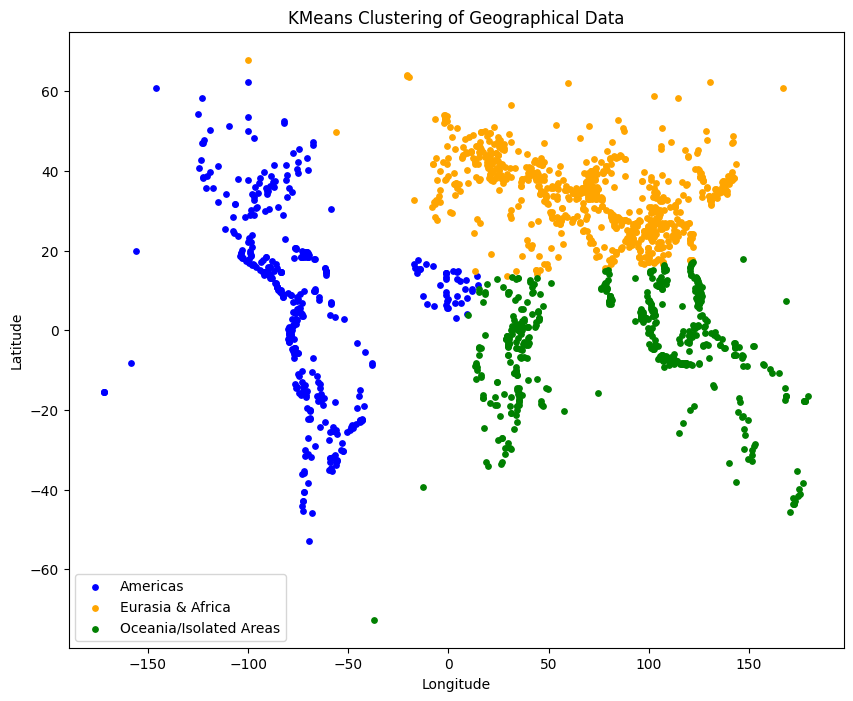

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
file_path = 'public_emdat_project.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

# Check if required columns exist
required_columns = ['Latitude', 'Longitude']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The CSV file is missing the following required columns: {', '.join(missing_columns)}")
    print("Available columns:", ', '.join(df.columns))
    exit()

# Prepare the data for clustering
data = df[['Latitude', 'Longitude']].dropna()

# Data Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply KMeans Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster centers and assign understandable names
cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)

# Assign cluster names based on geographical characteristics
cluster_names = {}
for i, center in enumerate(cluster_centers_original):
    lat, lon = center
    if lat > 0 and lon < -30:  # Likely Americas
        cluster_names[i] = "Americas"
    elif lat > 0 and lon > 0:  # Likely Eurasia & Africa
        cluster_names[i] = "Eurasia & Africa"
    else:  # Likely Oceania or isolated areas
        cluster_names[i] = "Oceania/Isolated Areas"

# Map cluster IDs to names in the dataset
data['cluster_name'] = data['cluster'].map(cluster_names)

# Save the updated data with cluster names
data.to_csv('kmeans_clustered_data_with_names.csv', index=False)
print("\nClustered data saved to 'kmeans_clustered_data_with_names.csv'")

# Additional insights: Count of points in each cluster and geographical distribution
cluster_counts = data['cluster_name'].value_counts()
geo_distribution = data.groupby('cluster_name')[['Latitude', 'Longitude']].agg(['min', 'max'])

print("\nCluster Counts:")
print(cluster_counts)

print("\nGeographical Distribution (min/max latitudes and longitudes):")
print(geo_distribution)

# Visualize the clusters with understandable names
plt.figure(figsize=(10, 8))

# Define colors for each cluster
colors = {
    'Americas': 'blue',
    'Eurasia & Africa': 'orange',
    'Oceania/Isolated Areas': 'green'
}

for cluster_name, color in colors.items():
    cluster_data = data[data['cluster_name'] == cluster_name]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=cluster_name, c=color, s=15)

plt.title('KMeans Clustering of Geographical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


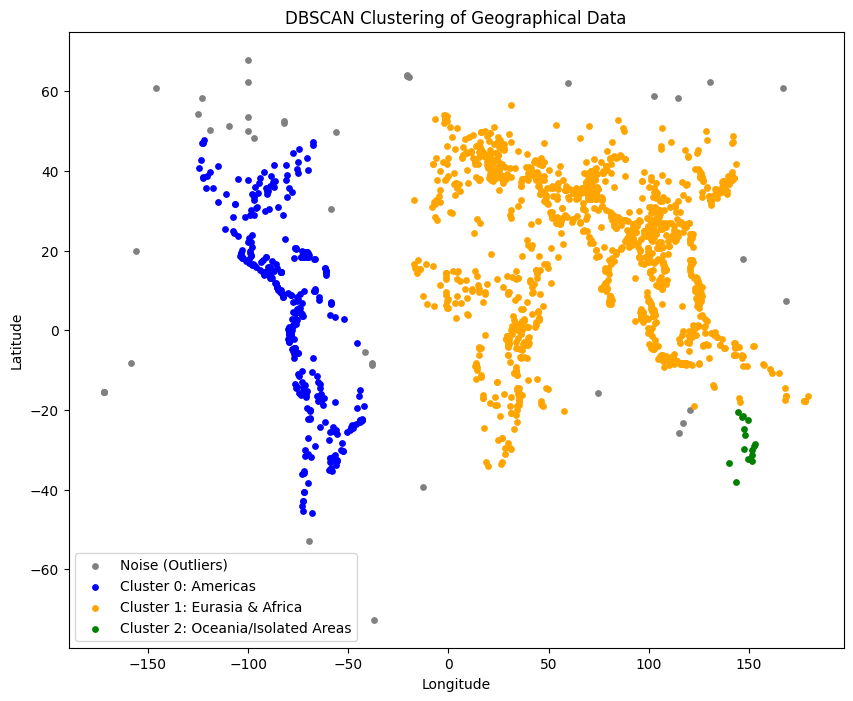


Cluster Analysis:
cluster
 1    1384
 0     365
-1      40
 2      15
 3      11
Name: count, dtype: int64

Descriptive statistics of each cluster:

Cluster 0: Americas:
         Latitude   Longitude
count  365.000000  365.000000
mean     6.263157  -78.007700
std     22.123013   16.694959
min    -45.953000 -124.692500
25%    -12.843000  -88.938000
50%     10.980000  -76.030000
75%     19.320000  -69.197000
max     47.860000  -41.940000

Cluster 1: Eurasia & Africa:
          Latitude    Longitude
count  1384.000000  1384.000000
mean     19.896670    73.849109
std      18.941683    42.890635
min     -34.090000   -17.080000
25%       4.643750    35.180000
50%      23.985000    78.852500
75%      36.038000   107.068750
max      56.477800   179.650000

Cluster 2: Oceania/Isolated Areas:
        Latitude   Longitude
count  15.000000   15.000000
mean  -28.152467  148.250533
std     5.169823    3.687892
min   -38.070000  139.898000
25%   -31.795000  146.835000
50%   -29.050000  147.950000
75

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
file_path = 'public_emdat_project.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

# Check if required columns exist
required_columns = ['Latitude', 'Longitude']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The CSV file is missing the following required columns: {', '.join(missing_columns)}")
    print("Available columns:", ', '.join(df.columns))
    exit()

# Prepare the data for clustering
data = df[['Latitude', 'Longitude']].copy()

# Remove rows with NaN values
data = data.dropna()

# Data Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust these parameters as needed
clusters = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
data['cluster'] = clusters

# Visualize the clusters with labels
plt.figure(figsize=(10, 8))

# Define cluster labels for better understanding
cluster_labels = {
    -1: "Noise (Outliers)",
    0: "Cluster 0: Americas",
    1: "Cluster 1: Eurasia & Africa",
    2: "Cluster 2: Oceania/Isolated Areas"
}

for cluster_id in np.unique(clusters):
    cluster_data = data[data['cluster'] == cluster_id]
    label = cluster_labels.get(cluster_id, f"Cluster {cluster_id}")
    if cluster_id == -1:
        # Noise points in gray
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=label, c='gray', s=15)
    elif cluster_id == 0:
        # Americas in blue
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=label, c='blue', s=15)
    elif cluster_id == 1:
        # Eurasia & Africa in orange
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=label, c='orange', s=15)
    elif cluster_id == 2:
        # Oceania/Isolated Areas in green
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=label, c='green', s=15)

plt.title('DBSCAN Clustering of Geographical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Cluster Analysis
print("\nCluster Analysis:")
print(data['cluster'].value_counts())

print("\nDescriptive statistics of each cluster:")
for cluster_id in np.unique(clusters):
    if cluster_id != -1:
        print(f"\n{cluster_labels.get(cluster_id, f'Cluster {cluster_id}')}:")
        print(data[data['cluster'] == cluster_id][['Latitude', 'Longitude']].describe())

# Save the dataframe with cluster labels to a new CSV file
data.to_csv('clustered_data_with_labels.csv', index=False)
print("\nClustered data saved to 'clustered_data_with_labels.csv'")


Dataset loaded successfully.

Clustered data saved to 'gmm_clustered_data_with_names.csv'


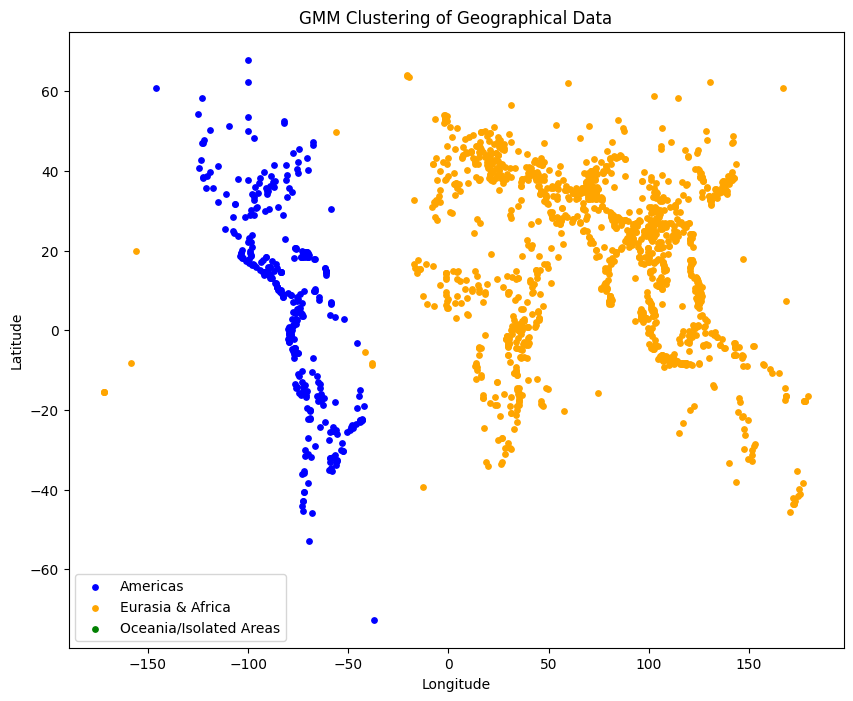


Cluster Counts:
cluster_name
Eurasia & Africa    1435
Americas             380
Name: count, dtype: int64

Geographical Distribution (min/max latitudes and longitudes):
                 Latitude        Longitude        
                      min    max       min     max
cluster_name                                      
Americas           -72.64  67.93  -145.990  -37.26
Eurasia & Africa   -45.69  63.98  -172.095  179.65


In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'public_emdat_project.csv'
try:
    df = pd.read_csv(file_path, encoding='latin1')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading the file: {e}")
    exit()

# Check if required columns exist
required_columns = ['Latitude', 'Longitude']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: The CSV file is missing the following required columns: {', '.join(missing_columns)}")
    print("Available columns:", ', '.join(df.columns))
    exit()

# Select Latitude and Longitude columns and remove NaN values
data = df[['Latitude', 'Longitude']].dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply Gaussian Mixture Model (GMM) clustering
n_components = 3  # Adjust the number of clusters as needed
gmm = GaussianMixture(n_components=n_components, random_state=42)
data['cluster'] = gmm.fit_predict(scaled_data)

# Analyze cluster centers and assign meaningful labels
cluster_centers = gmm.means_
cluster_centers_original = scaler.inverse_transform(cluster_centers)

# Assign cluster names based on geographical characteristics
cluster_labels = {}
for i, center in enumerate(cluster_centers_original):
    lat, lon = center
    if lat > 0 and lon < -30:  # Likely Americas
        cluster_labels[i] = "Americas"
    elif lat > 0 and lon > 0:  # Likely Eurasia & Africa
        cluster_labels[i] = "Eurasia & Africa"
    else:  # Likely Oceania or isolated areas
        cluster_labels[i] = "Oceania/Isolated Areas"

# Map cluster IDs to names in the dataset
data['cluster_name'] = data['cluster'].map(cluster_labels)

# Save the clustered data to a new CSV file
data.to_csv('gmm_clustered_data_with_names.csv', index=False)
print("\nClustered data saved to 'gmm_clustered_data_with_names.csv'")

# Visualize the GMM clustering results with meaningful labels
plt.figure(figsize=(10, 8))

# Define colors for clusters based on their assigned names
colors = {
    "Americas": 'blue',
    "Eurasia & Africa": 'orange',
    "Oceania/Isolated Areas": 'green'
}

for cluster_name, color in colors.items():
    cluster_data = data[data['cluster_name'] == cluster_name]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                label=cluster_name, c=color, s=15)

plt.title('GMM Clustering of Geographical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Additional Insights: Cluster Counts and Geographical Distribution
print("\nCluster Counts:")
print(data['cluster_name'].value_counts())

print("\nGeographical Distribution (min/max latitudes and longitudes):")
geo_distribution = data.groupby('cluster_name')[['Latitude', 'Longitude']].agg(['min', 'max'])
print(geo_distribution)
